## 46-886 

## Interpreting Model Outputs

### Application: California Housing Prices

Amr Farahat

CMU / Tepper

2023-04-05

---

### Setting Up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [3]:
import shap

In [4]:
pd.options.display.max_columns = None

### Data

In [5]:
# a classic housing price dataset
X,y = shap.datasets.california(n_points=1000)

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 2732 to 10525
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      1000 non-null   float64
 1   HouseAge    1000 non-null   float64
 2   AveRooms    1000 non-null   float64
 3   AveBedrms   1000 non-null   float64
 4   Population  1000 non-null   float64
 5   AveOccup    1000 non-null   float64
 6   Latitude    1000 non-null   float64
 7   Longitude   1000 non-null   float64
dtypes: float64(8)
memory usage: 70.3 KB


### Linear Regression Model

In [8]:
mod_lr = LinearRegression()
mod_lr.fit(X, y)

LinearRegression()

In [9]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", mod_lr.coef_[i].round(5))

Model coefficients:

MedInc = 0.45769
HouseAge = 0.01153
AveRooms = -0.12529
AveBedrms = 1.04053
Population = 5e-05
AveOccup = -0.29795
Latitude = -0.41204
Longitude = -0.40125


In [10]:
pred_lr = mod_lr.predict(X)

### Random Forest Model

In [11]:
mod_rf = RandomForestRegressor(max_features = 'sqrt', random_state=886)

In [12]:
mod_rf.fit(X, y)

RandomForestRegressor(max_features='sqrt', random_state=886)

In [13]:
pred_rf = mod_rf.predict(X)

### Surrogate Model

Using Linear Regression to explain random forest model

In [15]:
mod_lr_rf = LinearRegression()
mod_lr_rf.fit(X, pred_rf)

LinearRegression()

In [16]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", mod_lr_rf.coef_[i].round(5))

Model coefficients:

MedInc = 0.44245
HouseAge = 0.01054
AveRooms = -0.11996
AveBedrms = 0.90836
Population = 3e-05
AveOccup = -0.28059
Latitude = -0.33963
Longitude = -0.3288


In [17]:
mod_lr_rf.score(X, pred_rf)

0.7711989060188016

### Partial Dependence Plot

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#feature-importances-with-a-forest-of-trees

In [18]:
model = mod_rf

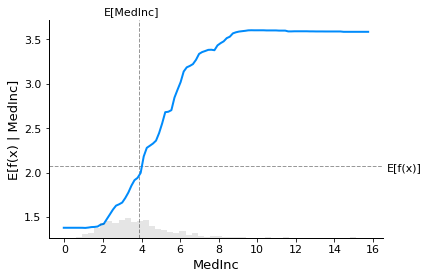

In [19]:
shap.partial_dependence_plot(
    "MedInc", model.predict, X, ice=False,
    model_expected_value=True, feature_expected_value=True
)

### Feature Importance Metrics

In [ ]:
model = mod_rf 

#### Feature importance based on mean decrease in impurity

In [ ]:
forest_importances_impurity = model.feature_importances_
plt.figure(figsize=(25,10))
plt.barh(X.columns, forest_importances_impurity)

#### Feature importance based on feature permutation

In [ ]:
result = permutation_importance(model, X, y, n_repeats=10, random_state=42, n_jobs=2)

In [ ]:
forest_importances_permutation = pd.Series(result.importances_mean, index=X.columns)

In [ ]:
plt.figure(figsize=(25,10))
plt.barh(X.columns, forest_importances_permutation)

### SHAP

In [ ]:
model = mod_lr

In [ ]:
#X100 = shap.utils.sample(X, 100) # 100 instances for use as the background distribution

In [ ]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X)

In [ ]:
sample_ind = 1

In [ ]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

In [ ]:
shap.plots.beeswarm(shap_values)

### END